# Identificação de Alzaimer em imagens RX

* Mohammad Reza Tabrizi

In [1]:
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import expand_dims
#import torch
import os
from tqdm import tqdm #barra de progreso`
import cv2
from PIL import Image
from glob import glob
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,img_to_array
#para redimencionar
import sklearn
import skimage
from skimage.transform import resize
import random
from sklearn.metrics import confusion_matrix
import datetime
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import rgb2gray
from keras.utils import plot_model
from keras.models import Model,Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D, Flatten, Embedding, Dropout,BatchNormalization
from keras.layers import MaxPooling2D,AveragePooling2D,GlobalAveragePooling2D,concatenate,Input
from keras.utils import to_categorical
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras import datasets, layers, models, optimizers
from keras.applications.imagenet_utils import preprocess_input
from sklearn.neighbors import KNeighborsClassifier
import pickle
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D,AveragePooling2D
from keras.layers.merge import concatenate

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/si

In [2]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
x_train = drive.CreateFile({'id':"**************"})   # **************
x_train.GetContentFile('xtrain.npy')        # file name
x_test = drive.CreateFile({'id':"**************"})   # **************
x_test.GetContentFile('xtest.npy')  
x_All_original_image = drive.CreateFile({'id':"**************"})   # **************
x_All_original_image.GetContentFile('X_all_Original_image.npy') 
y_train = drive.CreateFile({'id':"**************"})  # **************
y_train.GetContentFile('ytrain.npy')
y_test = drive.CreateFile({'id':"**************"})   # **************
y_test.GetContentFile('ytest.npy')        # 
y_All_original_omage = drive.CreateFile({'id':"**************"}) # **************
y_All_original_omage.GetContentFile('y_all_Original_image.npy')
X_Arurgmantation = drive.CreateFile({'id':"**************"})   # **************
X_Arurgmantation.GetContentFile('X_Arurgmantation.npy')        # file name
y_Arurgmantation = drive.CreateFile({'id':"**************"})   # **************
y_Arurgmantation.GetContentFile('y_Arurgmantation.npy') 

In [4]:
X_train = np.load('xtrain.npy')
y_train = np.load('ytrain.npy')
X_test = np.load('xtest.npy')
y_test = np.load('ytest.npy')

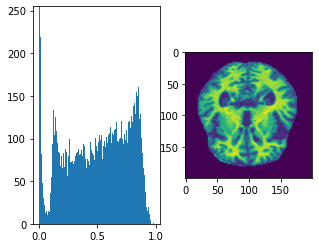

<Figure size 360x288 with 0 Axes>

imagen é dê classe : 2


In [17]:
def plotHistogram(a):
    plt.figure(figsize=(5,4))
    plt.subplot(1, 2, 1)
    plt.hist(a.ravel(), bins=255)
    axes = plt.gca()
    axes.set_ylim([0,255])
    plt.subplot(1, 2, 2)
    im = a
    im = im[:,:]
    plt.imshow(im)
    #plt.imshow(a, vmin=0, vmax=1)

    plt.figure(figsize=(5,4))
    plt.show()
plotHistogram(X_train[1])
print('imagen é dê classe :',y_train[1])

Normal:


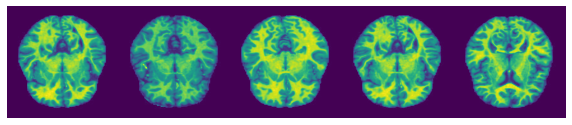

In [19]:
X_all=X_train
y_all=y_train
index2=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==0:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('Normal:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1,5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:]
    plt.imshow(im)
    plt.axis('off')

ModerateDemented:


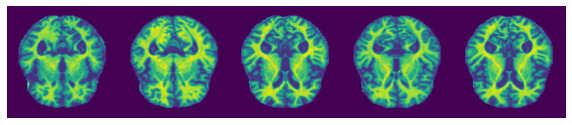

In [20]:
index2=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==1:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('ModerateDemented:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1, 5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:]
    plt.imshow(im)
    plt.axis('off')

MildDemented:


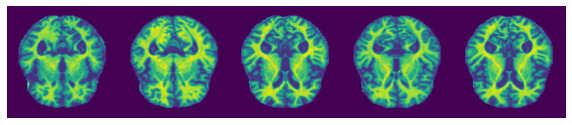

In [21]:
index3=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==2:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('MildDemented:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1, 5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:]
    plt.imshow(im)
    plt.axis('off')

VeryMildDemented:


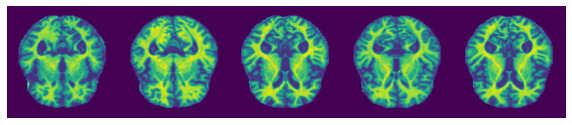

In [22]:
index3=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==3:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('VeryMildDemented:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1, 5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:]
    plt.imshow(im)
    plt.axis('off')